In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from os import listdir
import csv
import shutil, os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import joblib
import sys
import lime
import lime.lime_tabular
import math
# path是当前脚本路径的上两级目录
path = os.path.abspath(os.path.join(os.path.dirname("__file__"),os.path.pardir,os.path.pardir))
# 添加上两级目录(如果自定义模块在上两级目录下)
sys.path.append(path)

from Candidate1.evaluate_sepsis_score import evaluate_sepsis_score
from sklearn.linear_model import LogisticRegression

In [9]:
'''
write all the patient data in the train_patient.csv file
append the patient_id tro identify each patient
add a time index for the data of each row (i.e., the data measured in an hour)
'''
def create_test_train_folder(test_npy, train_npy_sepsis,train_npy_nosepsis):
    test_set = np.sort(np.load(test_npy))
    train_sepsis = np.sort(np.load(train_npy_sepsis))
    train_nosepsis = np.sort(np.load(train_npy_nosepsis))
    train_set = np.sort(np.concatenate((train_sepsis,train_nosepsis), axis=0))
    all_traincsv = listdir('../data/all_dataset')
    if not os.path.exists('../data/train_set_rf'):
        os.mkdir( '../data/train_set_rf')
    if not os.path.exists('../data/test_set_rf'):
        os.mkdir( '../data/test_set_rf')


    for f in train_set:
        shutil.copy(os.path.join('../data/all_dataset', f), '../data/train_set_rf' )

    for f in test_set:
        shutil.copy(os.path.join('../data/all_dataset', f), '../data/test_set_rf' )

In [ ]:
'''
preprocessing dataset
'''
def preprocessing_rf(test_npy, train_npy_sepsis,train_npy_nosepsis):
    # load the training and testing dataset, which are the same with candidate 1


    test_set = np.sort(np.load(test_npy ))
    train_sepsis = np.sort(np.load(train_npy_sepsis))
    train_nosepsis = np.sort(np.load(train_npy_nosepsis))
    train_set =  np.concatenate((train_sepsis,train_nosepsis), axis=0)
    all_traincsv = listdir('../data/all_dataset')



    # create and write the headers of the file

    with open('../data/test_rf.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        with open('../data/all_dataset/'+ all_traincsv[0],'r') as csvinput:
            reader = csv.reader(csvinput, delimiter='|')
            all = []
            row = next(reader)
            row.append('Patient_id') 
            row.append('time')
            all.append(row)
            writer.writerows(all)
    with open('../data/train_rf.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        with open('../data/all_dataset/'+ all_traincsv[0],'r') as csvinput:
            reader = csv.reader(csvinput, delimiter='|')
            all = []
            row = next(reader)
            row.append('Patient_id')
            row.append('time')
            all.append(row)
            writer.writerows(all)
 
    with open('../data/train_rf.csv', 'a') as csvoutput:
#  csv.reader() Return a reader object which will iterate over lines in the given csvfile.
        writer = csv.writer(csvoutput, lineterminator='\n')
        for ind, csv_name in enumerate(train_set):
            with open('../data/train_set_rf/'+ csv_name,'r') as csvinput:
                reader = csv.reader(csvinput, delimiter='|')
                all = []
                row = next(reader)
                for i,row in enumerate(reader):
                    row.append(ind)
                    row.append(i)
                    all.append(row)
                writer.writerows(all)

    with open('../data/test_rf.csv', 'a') as csvoutput:
#  csv.reader() Return a reader object which will iterate over lines in the given csvfile.
        writer = csv.writer(csvoutput, lineterminator='\n')


        for ind, csv_name in enumerate(test_set):
            with open('../data/test_set_rf/'+ csv_name,'r') as csvinput:
                reader = csv.reader(csvinput, delimiter='|')
                all = []
                row = next(reader)
                for i,row in enumerate(reader):
                    row.append(ind)
                    row.append(i)
                    all.append(row)
                writer.writerows(all)
 

In [5]:
    training_set = pd.read_csv('train_set_all_filled.csv')
    X_train = training_set.drop(['SepsisLabel','Patient_id'],  axis =1 )
    Y_train = training_set.SepsisLabel

In [8]:
    lr = LogisticRegression(random_state=0, max_iter = 1000).fit(X_train, Y_train)
    joblib.dump(lr,'../saved_model/LR.sav')

['../saved_model/LR.sav']

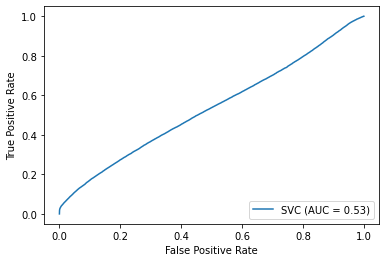

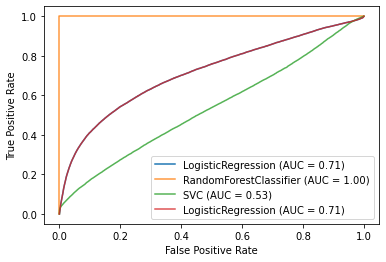

In [11]:
    rf = joblib.load("../saved_model/random_forest.sav")
    svc = joblib.load("../saved_model/svc.sav")
    svc_disp = plot_roc_curve(svc, X_train, Y_train)
    #plt.show()
    lr_disp = plot_roc_curve(lr, X_train, Y_train)
    # Get the current Axes instance on the current figure matching the given keyword args, or create one.
    ax = plt.gca()
    rf_disp = plot_roc_curve(rf, X_train, Y_train, ax=ax, alpha=0.8)
    svc_disp.plot(ax=ax, alpha=0.8)
    lr_disp.plot(ax=ax, alpha=0.8)
    plt.show()

In [13]:
    test_set =  np.load('../../Candidate1/data/test_set.npy')
    test_set = np.sort(test_set,axis = None)

In [16]:
    T=13

In [17]:
    test_set[0:T-1
            ]

array(['p000016.psv', 'p000025.psv', 'p000027.psv', 'p000029.psv',
       'p000046.psv', 'p000047.psv', 'p000050.psv', 'p000062.psv',
       'p000065.psv', 'p000073.psv', 'p000081.psv', 'p000085.psv'],
      dtype='<U11')